In [2]:
import copy
from itertools import chain, combinations
import main as s
import numpy as np
import generator.generator as gens
import ipyvolume as ipv
import core.solver as solve
from core.evaluate import naive_imp, naive_imp2
from core.point import Point
from core.solution import Solution, Partition, ConcreteSolution

def print_iterable( iterable):
    for x in iterable:
        print(x)
    print()


Init a random example 

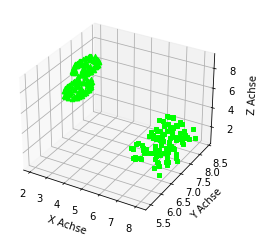

In [ ]:
confsphere = gens.SphereGeneratorConf(100,2,0.5)
confcube = gens.CubeGeneratorConf(100,1,1)

gen = gens.SphereGenerator(conf=confsphere)
gen2 = gens.CubeGenerator(conf=confcube)

instance, correct = gen.create_point_Instance().plus(gen2).get_instance_and_correct_solution()
sol = solve.first_solution(instance,3)
# initial start produce first solution
sol = solve.iterate_n_times(sol)
s.complete(sol)


To divide a cluster into two parts you have to call solver.add_cluster

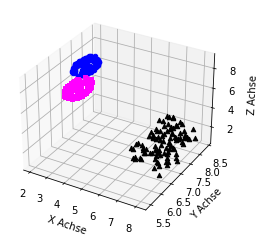

In [ ]:
sol = solve.split_cluster(sol)
s.complete(sol)

Now we bring the split back to one

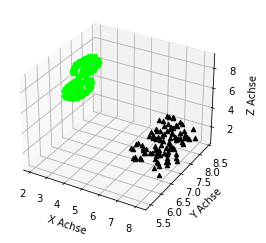

In [ ]:
sol = solve.reduce_cluster(sol)
s.complete(sol)

In [ ]:
point1 = Point(1,1,1)
point2 = Point(1,1,2)
point3 = Point(1,1,3)

sol2 = ConcreteSolution(tuple([point1,point3,point2]),1)
sol2.partitions[0]._center= Point()
sol2.sort_partitions()
print_iterable(sol2.partitions[0])



parti = Partition()
parti.add(point1)
parti.add(point2)

parti2 = copy.deepcopy(parti)

parti2.add(point3)
parti2.remove(point1)

print_iterable(parti)
print_iterable(parti2)


solution = ConcreteSolution([point1,point2,point3],2)
solution_copy = solution.clone()
solution_copy.partitions[0].add(point3)
solution_copy.partitions[0].add(point3)
solution_copy.partitions[0].add(point3)
solution_copy.partitions[1].add(Point())

print_iterable(chain.from_iterable([parti,parti2]))

Point: x= 1 y= 1 z= 1
Point: x= 1 y= 1 z= 2
Point: x= 1 y= 1 z= 3

Point: x= 1 y= 1 z= 1
Point: x= 1 y= 1 z= 2

Point: x= 1 y= 1 z= 2
Point: x= 1 y= 1 z= 3

Point: x= 1 y= 1 z= 1
Point: x= 1 y= 1 z= 2
Point: x= 1 y= 1 z= 2
Point: x= 1 y= 1 z= 3



In [ ]:
#print_iterable(parti.to_BiPoint_list())
#print_iterable(parti2.to_BiPoint_list())
for x in solution_copy.partitions:
    print_iterable(x.to_BiPoint_list())

AttributeError: 'Point' object has no attribute 'index'

In [ ]:
    centermap = solution.get_center_map_with_new_Partition()
    new_centermap = solution.get_center_map()
    print("Okay")

In [ ]:
sol_one_part = ConcreteSolution(instance,1)
sol_one_part = solve.iterate_n_times(sol_one_part,5)

sol_two_part = ConcreteSolution(instance,2)
sol_two_part = solve.iterate_n_times(sol_two_part,5)

sol_six_part = ConcreteSolution(instance,6)
sol_six_part = solve.iterate_n_times(sol_six_part,5)

sol_100_part = ConcreteSolution(instance,100)
sol_100_part = solve.iterate_n_times(sol_100_part,5)

import time

start = time.perf_counter()
"""
print(naive_imp(sol))
end = time.perf_counter()
print(f"Normal: {end-start}")
start = time.perf_counter()
#print(naive_imp2(sol))
end = time.perf_counter()
print(f"Numpy: {end-start}")
print(naive_imp(sol_one_part))
print(naive_imp(sol_two_part))
print(naive_imp(sol_six_part))
print(naive_imp(sol_100_part))


print(naive_imp(correct))
"""
#  1374904.0580217554
# 79694646.90742968
# 17188849.80881331
#  1374904.058021525

In [ ]:
import ctypes
from pathlib import WindowsPath, Path

libname = WindowsPath().absolute() / "CUBIC-Partition-Support.dll"

c_lib = ctypes.CDLL("C:\\Users\\Oliver\\workspace\\cluster search\\src\\CUBIC-Partition-Support.dll")
c_lib.main()
c_lib.test()

#ctypes.Structure.

In [ ]:

def tester ():
    return 2,3,4,5

var = tester()
print(var)

x = Path()
print_iterable(x.iterdir())
print(str(x))


In [5]:
from conf.planeGeneratorConf import PlaneGeneratorConf


planegen = gens.PlaneGenerator(conf=PlaneGeneratorConf.default_Conf())
planegen.conf.points_per_cluster = 1<<10
planegen.add_plane(Point(0,0,0), Point(1,0,4),Point(0,1,4) )
planegen.add_plane(Point(0,0,0), Point(-2,0,7),Point(0,3,5) )



planegen.create_point_Instance()
plane_inst, plane_correct = planegen.get_instance_and_correct_solution()
first = solve.first_solution(plane_inst,True,3)
s.complete(first,plane_correct)


C:\Users\Oliver\workspace\cluster search\src\core\point.py:137: RuntimeWarning: invalid value encountered in double_scalars
  x = self.x / absolute
C:\Users\Oliver\workspace\cluster search\src\core\point.py:138: RuntimeWarning: invalid value encountered in double_scalars
  y = self.y / absolute
C:\Users\Oliver\workspace\cluster search\src\core\point.py:139: RuntimeWarning: invalid value encountered in double_scalars
  z = self.z / absolute


KeyboardInterrupt: 

In [ ]:
from multiprocessing import Pool, Process

def f(x):
    print(x*x*x+x)

p = Process(target=f, args=(5,))
print("okay")
p.start()
p.join()

#with Pool() as p:
#    print(p.map(f,[1,2,3,4]))


In [ ]:
import sys
import numpy as np

print(sys.getsizeof(2.0))
print(sys.getsizeof("Hallo"))
print(sys.getsizeof(""))
listen = [2.0]*500
print(sys.getsizeof(listen))
gen = np.array(listen,dtype=np.float32)
print(sys.getsizeof(gen))


In [ ]:
p1 = Point()
p2 = Point()
print(p1==p2)
print(p1 is not p2)


In [ ]:
from core.point import random_Point

new_part = Partition()
points = [random_Point() for x in range(10)]
new_part.set_points(points)
new_part.get_points().sort(key=lambda x: x - new_part.get_center())
print ("done")



In [ ]:
iter = combinations([1,2,3,4,5],2)
array = np.zeros(4)
array[:3] = Point(1,2,3).to_tuple()[:]
array
np.zeros(shape=(3,3))[1,2]


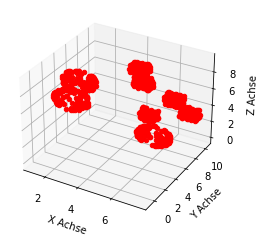

In [3]:
spheregen = gens.SphereGenerator()
cube  = gens.CubeGenerator()
instance, solution = cube.plus(spheregen).get_instance_and_correct_solution()

solution_show = solve.first_solution(instance, 1)
s.complete(solution_show, solution, True)
s.save_as_html("show")


In [ ]:
solution